# World Bank Data ETL Pipeline Demo Project

This notebook aims to demonstrate data pipe process of Extraction, Transformation and Loading. It make use of World Bank Data as the source of data for this demonstration.

## Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## I. Extraction

In the extraction phase, three ways of extraction will be demonstrated. The sources that will be extracted are from csv,
SQL database, JSON and API.

### Extracting data from CSV

In [2]:
#here, data will be imported from projects_data.csv
df_projects = pd.read_csv('projects_data.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26384\4135820769.py:2: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_projects = pd.read_csv('projects_data.csv')


Importing the data from csv returns an error. Dataset can have confusing format. Will now import
everything as string datatype

In [3]:
df_projects = pd.read_csv('projects_data.csv', dtype='str')

In [4]:
#now displaying first five rows of the dataframe
df_projects.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN


In [5]:
#checking the shape of the dataframe
df_projects.shape

(18248, 57)

In [6]:
#checking for null values
df_projects.isnull().sum()

id                              0
regionname                      0
countryname                     0
prodline                        0
lendinginstr                  246
lendinginstrtype              246
envassesmentcategorycode     5811
supplementprojectflg           53
productlinetype                 0
projectstatusdisplay            4
status                          4
project_name                    0
boardapprovaldate            1504
board_approval_month         1504
closingdate                  3349
lendprojectcost               125
ibrdcommamt                     0
idacommamt                      0
totalamt                        0
grantamt                        0
borrower                     5919
impagency                    6097
url                             0
projectdoc                  18248
majorsector_percent         18248
sector1                         0
sector2                      8721
sector3                     11761
sector4                     13872
sector5       

In [7]:
#checking for duplicates
df_projects.duplicated().sum()

0

The df_projects dataframe has issues that will be solved later on transformation.


In [8]:
#importing population data
df_population = pd.read_csv('population_data.csv')

ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 63


The file might have some issues. Will be using file reader

In [9]:
f = open('population_data.csv')
for i in range(10):
    line = f.readline()
    print('line: ', i, line)
f.close()

line:  0 ï»¿"Data Source","World Development Indicators",

line:  1 

line:  2 "Last Updated Date","2018-06-28",

line:  3 

line:  4 "Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017",

line:  5 "Aruba","ABW","Population, total","SP.POP.TOTL","54211","55438","56225","56695","57032","57360","57715","58055","58386","58726","59063","59440","59840","60243","60528","60657","60586","60366","60103","59980","60096","60567","61345","62201","62836","63026","62644","61833","61079","61032","62149","64622","68235","72504","76700","80324","83200","85451","87277","89005","90853","92898","

The first four lines does not have data. Will be skipping on read_csv() method

In [10]:
#reading again
df_population = pd.read_csv('population_data.csv', skiprows=4)

In [11]:
#displaying dataframe
df_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [12]:
#checking the shape
df_population.shape

(264, 63)

In [13]:
#checking for nulls
df_population.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                4
                 ... 
2014                2
2015                2
2016                2
2017                2
Unnamed: 62       264
Length: 63, dtype: int64

In [14]:
#column 'Unnamed: 62' has all null values. will be dropping the columns
df_population = df_population.drop('Unnamed: 62', axis=1)

In [15]:
#checking the rows with null
df_population.loc[df_population.isnull().any(axis=1)]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
67,Eritrea,ERI,"Population, total",SP.POP.TOTL,1397491.0,1432640.0,1469645.0,1508273.0,1548187.0,1589179.0,...,4232636.0,4310334.0,4390840.0,4474690.0,NaN,NaN,NaN,NaN,NaN,NaN
108,Not classified,INX,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,Kuwait,KWT,"Population, total",SP.POP.TOTL,269618.0,301336.0,338296.0,379891.0,425235.0,473554.0,...,2652340.0,2818939.0,2998083.0,3191051.0,3395556.0,3598385.0,3782450.0,3935794.0,4052584.0,4136528.0
194,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,3596688.0,3702218.0,3811102.0,3927051.0,4046901.0,4169506.0,4294682.0,4422143.0,4551566.0,4684777.0
212,Serbia,SRB,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,7350222.0,7320807.0,7291436.0,7234099.0,7199077.0,7164132.0,7130576.0,7095383.0,7058322.0,7022268.0
223,Sint Maarten (Dutch part),SXM,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,33964.0,34238.0,34056.0,33435.0,34640.0,36607.0,37685.0,38824.0,39969.0,41109.0


There are rows with missing values to a corresponding year columns. Will fix in transformation later

### Extracting from JSON and XML

#### Extracting from JSON File

In [16]:
#reading using pandas
df_json = pd.read_json('population_data.json', orient='records')
df_json.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [17]:
#using json library
import json

with open('population_data.json') as f:
    json_data = json.load(f)


#reading the first record
print(json_data[0])
print('\n')

#printing data from json dictionary
print(json_data[0]['Country Name'])
print(json_data[0]['Country Code'])

{'Country Name': 'Aruba', 'Country Code': 'ABW', 'Indicator Name': 'Population, total', 'Indicator Code': 'SP.POP.TOTL', '1960': 54211.0, '1961': 55438.0, '1962': 56225.0, '1963': 56695.0, '1964': 57032.0, '1965': 57360.0, '1966': 57715.0, '1967': 58055.0, '1968': 58386.0, '1969': 58726.0, '1970': 59063.0, '1971': 59440.0, '1972': 59840.0, '1973': 60243.0, '1974': 60528.0, '1975': 60657.0, '1976': 60586.0, '1977': 60366.0, '1978': 60103.0, '1979': 59980.0, '1980': 60096.0, '1981': 60567.0, '1982': 61345.0, '1983': 62201.0, '1984': 62836.0, '1985': 63026.0, '1986': 62644.0, '1987': 61833.0, '1988': 61079.0, '1989': 61032.0, '1990': 62149.0, '1991': 64622.0, '1992': 68235.0, '1993': 72504.0, '1994': 76700.0, '1995': 80324.0, '1996': 83200.0, '1997': 85451.0, '1998': 87277.0, '1999': 89005.0, '2000': 90853.0, '2001': 92898.0, '2002': 94992.0, '2003': 97017.0, '2004': 98737.0, '2005': 100031.0, '2006': 100832.0, '2007': 101220.0, '2008': 101353.0, '2009': 101453.0, '2010': 101669.0, '2011'

#### Extracting from XML

In [18]:
from bs4 import BeautifulSoup

#open xml file
with open('population_data.xml') as fp:
    soup = BeautifulSoup(fp, 'lxml')

In [19]:
#print the first 5 records
i = 0

for record in soup.find_all('record'):
    i += 1
    for record in record.find_all('field'):
        print(record['name'], ': ', record.text)
    print()
    if i == 5:
        break
    

Country or Area :  Aruba
Item :  Population, total
Year :  1960
Value :  54211

Country or Area :  Aruba
Item :  Population, total
Year :  1961
Value :  55438

Country or Area :  Aruba
Item :  Population, total
Year :  1962
Value :  56225

Country or Area :  Aruba
Item :  Population, total
Year :  1963
Value :  56695

Country or Area :  Aruba
Item :  Population, total
Year :  1964
Value :  57032



### Extracting from SQL Databases

#### sqlite3

In [20]:
import sqlite3

#connection to the database
conn = sqlite3.connect('population_data.db')

#run a query
pd.read_sql('SELECT * FROM population_data', conn)

,index,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [21]:
#query specific columns
pd.read_sql('SELECT "Country_Name", "Country_Code", "1960" FROM population_data', conn)

,Country_Name,Country_Code,1960
0,Aruba,ABW,54211.0
1,Afghanistan,AFG,8996351.0
2,Angola,AGO,5643182.0
3,Albania,ALB,1608800.0
4,Andorra,AND,13411.0
...,...,...,...
259,Kosovo,XKX,947000.0
260,"Yemen, Rep.",YEM,5172135.0
261,South Africa,ZAF,17456855.0
262,Zambia,ZMB,3044846.0


### Extracting from API

In [22]:
#importing from world bank data
import requests

url = 'http://api.worldbank.org/v2/countries/br;cn;us;de/indicators/SP.POP.TOTL/?format=json&per_page=1000'
r = requests.get(url)
r.json()

[{'page': 1,
  'pages': 1,
  'per_page': 1000,
  'total': 252,
  'sourceid': '2',
  'lastupdated': '2024-02-21'},
 [{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2022',
   'value': 215313498,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2021',
   'value': 214326223,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2020',
   'value': 213196304,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2019',

In [23]:
#reading json result to dataframe
pd.DataFrame(r.json()[1])

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2022,215313498,,,0
1,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2021,214326223,,,0
2,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2020,213196304,,,0
3,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2019,211782878,,,0
4,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2018,210166592,,,0
...,...,...,...,...,...,...,...,...
247,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1964,191889000,,,0
248,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1963,189242000,,,0
249,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1962,186538000,,,0
250,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1961,183691000,,,0


Dataframe above needs transformation, with will be done in 'transform' phase of the pipeline

Activity: Use API indicator to request rural population data for Switzerland in the years 1995 through 2001.

In [24]:
#TODO
url = 'http://api.worldbank.org/v2/country/CH/indicator/SP.POP.TOTL/?format=json&date=1995:2001'

r = requests.get(url)
r.json()

[{'page': 1,
  'pages': 1,
  'per_page': 50,
  'total': 7,
  'sourceid': '2',
  'lastupdated': '2024-02-21'},
 [{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'CH', 'value': 'Switzerland'},
   'countryiso3code': 'CHE',
   'date': '2001',
   'value': 7229854,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'CH', 'value': 'Switzerland'},
   'countryiso3code': 'CHE',
   'date': '2000',
   'value': 7184250,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'CH', 'value': 'Switzerland'},
   'countryiso3code': 'CHE',
   'date': '1999',
   'value': 7143991,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'CH', 'value': 'Switzerland'},
   'countryiso3code': 'CHE',
   'date

## II. Transformation

### Combining Data

In [25]:
df_rural = pd.read_csv('rural_population_percent.csv', skiprows=4)
df_rural.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,NaN


In [26]:
df_electricity = pd.read_csv('electricity_access_percent.csv', skiprows=4)
df_electricity.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN


In [27]:
#check df_rural for nulls
df_rural.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                5
                 ... 
2014                4
2015                4
2016                4
2017                4
Unnamed: 62       264
Length: 63, dtype: int64

In [28]:
#dropping column 'Unnamed: 62'
df_rural = df_rural.drop(['Unnamed: 62'], axis=1)

In [29]:
#checking df_electricity
df_electricity.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
                 ... 
2014                3
2015                3
2016                3
2017              264
Unnamed: 62       264
Length: 63, dtype: int64

In [30]:
#dropping column 'Unnamed: 62'
df_electricity = df_electricity.drop(['Unnamed: 62'], axis=1)

In [31]:
df_rural.shape

(264, 62)

In [32]:
df_electricity.shape

(264, 62)

In [33]:
#concatinating the dataframes
df_rural_elec = pd.concat([df_rural, df_electricity])
df_rural_elec.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.217,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,76.054,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,61.491,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,50.009,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.133,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873


In [34]:
df_rural_elec.shape

(528, 62)

### Cleaning

In [35]:
#load population data
df_indicator = pd.read_csv('population_data.csv', skiprows=4)
df_indicator = df_indicator.drop(['Unnamed: 62'], axis=1)
df_indicator.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [36]:
#load projects data
df_projects = df_projects.drop(['Unnamed: 56'], axis=1)
df_projects.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme2name,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG


In [37]:
#output unique country and code on df_indicator
pd.unique(df_indicator['Country Name'])

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding high income)',
       '

In [38]:
pd.unique(df_indicator['Country Code'])

array(['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARB', 'ARE', 'ARG', 'ARM',
       'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA',
       'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL',
       'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CEB', 'CHE',
       'CHI', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM',
       'CPV', 'CRI', 'CSS', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU',
       'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'EAP', 'EAR', 'EAS', 'ECA',
       'ECS', 'ECU', 'EGY', 'EMU', 'ERI', 'ESP', 'EST', 'ETH', 'EUU',
       'FCS', 'FIN', 'FJI', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO',
       'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL',
       'GTM', 'GUM', 'GUY', 'HIC', 'HKG', 'HND', 'HPC', 'HRV', 'HTI',
       'HUN', 'IBD', 'IBT', 'IDA', 'IDB', 'IDN', 'IDX', 'IMN', 'IND',
       'INX', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR',
       'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT',
       'LAC', 'LAO',

In [39]:
df_indicator.loc[:,['Country Name', 'Country Code']].duplicated().sum()

0

The goal is to fix the country name and provide ISO country code

In [40]:
df_projects['countryname'].unique()

array(['World;World',
       'Democratic Republic of the Congo;Democratic Republic of the Congo',
       "People's Republic of Bangladesh;People's Republic of Bangladesh",
       'Islamic  Republic of Afghanistan;Islamic  Republic of Afghanistan',
       'Federal Republic of Nigeria;Federal Republic of Nigeria',
       'Republic of Tunisia;Republic of Tunisia',
       'Lebanese Republic;Lebanese Republic',
       'Democratic Socialist Republic of Sri Lan;Democratic Socialist Republic of Sri Lan',
       'Nepal;Nepal', 'Kyrgyz Republic;Kyrgyz Republic',
       'Hashemite Kingdom of Jordan;Hashemite Kingdom of Jordan',
       'Republic of the Union of Myanmar;Republic of the Union of Myanmar',
       'Arab Republic of Egypt;Arab Republic of Egypt',
       'United Republic of Tanzania;United Republic of Tanzania',
       'Federal Democratic Republic of Ethiopia;Federal Democratic Republic of Ethiopia',
       'Burkina Faso;Burkina Faso',
       'Republic of Uzbekistan;Republic of Uzbekist

In [41]:
#creating a new columns for official country names
df_projects['Official Country Name'] = df_projects['countryname'].str.split(';').str.get(0)
df_projects.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Official Country Name
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Democratic Republic of the Congo
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,People's Republic of Bangladesh
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Islamic Republic of Afghanistan
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,Federal Republic of Nigeria


Will use pycountry library to find the ISO code for each country

In [42]:
#importing library
from pycountry import countries

In [43]:
#testing the library
countries.get(name='Spain')

Country(alpha_2='ES', alpha_3='ESP', flag='🇪🇸', name='Spain', numeric='724', official_name='Kingdom of Spain')

In [44]:
#testing using lookup method
countries.lookup('Kingdom of Spain')

Country(alpha_2='ES', alpha_3='ESP', flag='🇪🇸', name='Spain', numeric='724', official_name='Kingdom of Spain')

The goal is to create a dictionary to contain the country names from projects dataframe and ISO code

In [45]:
#importing libraries
from collections import defaultdict
country_not_found = [] #a list containing countries not fount in the pycountry library

#set up an empty dictionary of string values
project_country_abbrev_dict = defaultdict(str)

# iterate through the country names in df_projects. 
# Create a dictionary mapping the country name to the alpha_3 ISO code

for country in df_projects['Official Country Name'].drop_duplicates().sort_values():
    try:
        # look up the country name in the pycountry library
        # store the country name as the dictionary key and the ISO-3 code as the value
        project_country_abbrev_dict[country] = countries.lookup(country).alpha_3
    except:
        # If the country name is not in the pycountry library, then print out the country name
        # And store the results in the country_not_found list
        print(country, ' not found')
        country_not_found.append(country)

Africa  not found
Andean Countries  not found
Aral Sea  not found
Asia  not found
Caribbean  not found
Caucasus  not found
Central Africa  not found
Central America  not found
Central Asia  not found
Co-operative Republic of Guyana  not found
Commonwealth of Australia  not found
Democratic Republic of Sao Tome and Prin  not found
Democratic Republic of the Congo  not found
Democratic Socialist Republic of Sri Lan  not found
EU Accession Countries  not found
East Asia and Pacific  not found
Eastern Africa  not found
Europe and Central Asia  not found
Islamic  Republic of Afghanistan  not found
Kingdom of Swaziland  not found
Latin America  not found
Macedonia  not found
Mekong  not found
Mercosur  not found
Middle East and North Africa  not found
Multi-Regional  not found
Organization of Eastern Caribbean States  not found
Oriental Republic of Uruguay  not found
Pacific Islands  not found
Red Sea and Gulf of Aden  not found
Republic of Congo  not found
Republic of Cote d'Ivoire  not fou

For countries that are not found in the pycountry database, we'll make use of list of countries from indicator dataframe

In [46]:
indicator_countries = df_indicator[['Country Name', 'Country Code']].drop_duplicates().sort_values(by='Country Name')

for country in country_not_found:
    if country in indicator_countries['Country Name'].tolist():
        print(country)

South Asia
St. Kitts and Nevis
St. Lucia
St. Vincent and the Grenadines
West Bank and Gaza
World


In [47]:
#manually create dictionary of contry codes
country_not_found_mapping = {'Co-operative Republic of Guyana': 'GUY',
             'Commonwealth of Australia':'AUS',
             'Democratic Republic of Sao Tome and Prin':'STP',
             'Democratic Republic of the Congo':'COD',
             'Democratic Socialist Republic of Sri Lan':'LKA',
             'East Asia and Pacific':'EAS',
             'Europe and Central Asia': 'ECS',
             'Islamic  Republic of Afghanistan':'AFG',
             'Latin America':'LCN',
              'Caribbean':'LCN',
             'Macedonia':'MKD',
             'Middle East and North Africa':'MEA',
             'Oriental Republic of Uruguay':'URY',
             'Republic of Congo':'COG',
             "Republic of Cote d'Ivoire":'CIV',
             'Republic of Korea':'KOR',
             'Republic of Niger':'NER',
             'Republic of Kosovo':'XKX',
             'Republic of Rwanda':'RWA',
              'Republic of The Gambia':'GMB',
              'Republic of Togo':'TGO',
              'Republic of the Union of Myanmar':'MMR',
              'Republica Bolivariana de Venezuela':'VEN',
              'Sint Maarten':'SXM',
              "Socialist People's Libyan Arab Jamahiriy":'LBY',
              'Socialist Republic of Vietnam':'VNM',
              'Somali Democratic Republic':'SOM',
              'South Asia':'SAS',
              'St. Kitts and Nevis':'KNA',
              'St. Lucia':'LCA',
              'St. Vincent and the Grenadines':'VCT',
              'State of Eritrea':'ERI',
              'The Independent State of Papua New Guine':'PNG',
              'West Bank and Gaza':'PSE',
              'World':'WLD'}

In [48]:
#appending/updating 'project_country_abbrev_dict ' with the manually created dictionary
project_country_abbrev_dict.update(country_not_found_mapping)

In [49]:
#add country code to projects dataframe
df_projects['Country Code'] = df_projects['Official Country Name'].apply(lambda x: project_country_abbrev_dict[x])
df_projects.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Official Country Name,Country Code
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World,WLD
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Democratic Republic of the Congo,COD
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,People's Republic of Bangladesh,BGD
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Islamic Republic of Afghanistan,AFG
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,Federal Republic of Nigeria,NGA


In [50]:
#checking countries with no country codes
df_projects.loc[df_projects['Country Code'] == '']

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Official Country Name,Country Code
31,P166648,Africa,Central Africa;Central Africa,RE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central Africa,
39,P163752,Africa,Africa;Africa,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,
58,P164728,Africa,Africa;Africa,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,
69,P161329,Africa,Western Africa;Western Africa,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Africa,
103,P164468,East Asia and Pacific,Pacific Islands;Pacific Islands,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,0002134431!$!Republic of Vanuatu!$!-16!$!167!$...,0002134431;0002135171,Republic of Vanuatu;Port-Vila,-16;-17.73381,167;168.32188,VU;VU,Pacific Islands,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18197,P009134,Europe and Central Asia,Socialist Federal Republic of Yugoslavia;Socia...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Socialist Federal Republic of Yugoslavia,
18215,P008873,Europe and Central Asia,Republic of Turkey;Republic of Turkey,PE,Financial Intermediary Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Republic of Turkey,
18221,P008872,Europe and Central Asia,Republic of Turkey;Republic of Turkey,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Republic of Turkey,
18222,P008874,Europe and Central Asia,Republic of Turkey;Republic of Turkey,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Republic of Turkey,


In [51]:
#reading population  data without convertion to string

df_indicator = pd.read_csv('population_data.csv', skiprows=4)
df_indicator = df_indicator.drop(['Unnamed: 62'], axis=1)

In [52]:
df_indicator.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
Length: 62, dtype: object

In [53]:
# Calculate the population sum by year for Canada,
#       the United States, and Mexico.

# the keepcol variable makes a list of the column names to keep. You can use this if you'd like
keepcol = ['Country Name']
for i in range(1960, 2018, 1):
    keepcol.append(str(i))

# In the df_nafta variable, store a data frame that only contains the rows for 
#      Canada, United States, and Mexico.
df_nafta = df_indicator[(df_indicator['Country Name'] == 'Canada') | 
             (df_indicator['Country Name'] == 'United States') | 
            (df_indicator['Country Name'] == 'Mexico')].iloc[:,]


# Calculate the sum of the values in each column in order to find the total population by year.
# You can use the keepcol variable if you want to control which columns get outputted
df_nafta.sum(axis=0)[keepcol]

Country Name    CanadaMexicoUnited States
1960                          236754121.0
1961                          241356126.0
1962                          245801588.0
1963                          250145880.0
1964                          254478272.0
1965                          258604043.0
1966                          262619038.0
1967                          266553812.0
1968                          270344019.0
1969                          274128481.0
1970                          278405861.0
1971                          283025259.0
1972                          287367782.0
1973                          291558995.0
1974                          295716280.0
1975                          300054399.0
1976                          304176763.0
1977                          308380884.0
1978                          312660488.0
1979                          317041689.0
1980                          321178871.0
1981                          325358195.0
1982                          3294

In [54]:
df_nafta

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
33,Canada,CAN,"Population, total",SP.POP.TOTL,17909009.0,18271000.0,18614000.0,18964000.0,19325000.0,19678000.0,...,33245773.0,33628571.0,34005274.0,34342780.0,34750545.0,35152370.0,35535348.0,35832513.0,36264604.0,36708083.0
152,Mexico,MEX,"Population, total",SP.POP.TOTL,38174112.0,39394126.0,40649588.0,41939880.0,43264272.0,44623043.0,...,113661809.0,115505228.0,117318941.0,119090017.0,120828307.0,122535969.0,124221600.0,125890949.0,127540423.0,129163276.0
249,United States,USA,"Population, total",SP.POP.TOTL,180671000.0,183691000.0,186538000.0,189242000.0,191889000.0,194303000.0,...,304093966.0,306771529.0,309338421.0,311644280.0,313993272.0,316234505.0,318622525.0,321039839.0,323405935.0,325719178.0


In [55]:
#checking datatypes for projects dataframe
df_projects.dtypes

id                          object
regionname                  object
countryname                 object
prodline                    object
lendinginstr                object
lendinginstrtype            object
envassesmentcategorycode    object
supplementprojectflg        object
productlinetype             object
projectstatusdisplay        object
status                      object
project_name                object
boardapprovaldate           object
board_approval_month        object
closingdate                 object
lendprojectcost             object
ibrdcommamt                 object
idacommamt                  object
totalamt                    object
grantamt                    object
borrower                    object
impagency                   object
url                         object
projectdoc                  object
majorsector_percent         object
sector1                     object
sector2                     object
sector3                     object
sector4             

In [56]:
df_projects[['totalamt', 'lendprojectcost']].head()

,totalamt,lendprojectcost
0,0,"500,000"
1,"200,000,000","200,000,000"
2,"58,330,000","50,000,000"
3,"20,000,000","50,000,000"
4,"100,000,000","100,000,000"


In [57]:
#converting totalamt column data to numeric type
df_projects['totalamt'] = pd.to_numeric(df_projects['totalamt'].str.replace(',',""))

In [58]:
df_projects['totalamt'].dtypes

dtype('int64')

#### Parsing dates

Another common data transformation involves parsing dates. Parsing generally means that you start with a string and then transform that string into a different data type. In this case, that means taking a date in the format of a string and transforming the string into a date type. Run the next cell to see an example.

In [59]:
parsed_date = pd.to_datetime('January 1st, 2017')
parsed_date

Timestamp('2017-01-01 00:00:00')

In [60]:
parsed_date.month

1

In [61]:
parsed_date.year

2017

In [62]:
parsed_date.second

0

Sometimes date string are formatted in unexpected ways. For example, in the United States, dates are given with the month first and then the day. That is what pandas expects by default. However, some countries write the date with the day first and then the month. Run the next three examples to see Panda's default behavior and how you can specify the date formatting.

In [63]:
parsed_date = pd.to_datetime('5/3/2017 5:30')
parsed_date.month

5

In [64]:
parsed_date = pd.to_datetime('5/3/2017 5:30', format='%d/%m/%Y %H:%M')
parsed_date.month

3

In [65]:
parsed_date = pd.to_datetime('5/3/2017 5:30', format='%m/%d/%Y %H:%M')
parsed_date.month

5

#### Looking into projects columns

In [66]:
df_projects.columns

Index(['id', 'regionname', 'countryname', 'prodline', 'lendinginstr',
       'lendinginstrtype', 'envassesmentcategorycode', 'supplementprojectflg',
       'productlinetype', 'projectstatusdisplay', 'status', 'project_name',
       'boardapprovaldate', 'board_approval_month', 'closingdate',
       'lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt',
       'borrower', 'impagency', 'url', 'projectdoc ', 'majorsector_percent ',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector5', 'sector',
       'mjsector1', 'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5',
       'mjsector', 'theme1', 'theme2', 'theme3', 'theme4', 'theme5', 'theme ',
       'goal', 'financier', 'mjtheme1name', 'mjtheme2name', 'mjtheme3name',
       'mjtheme4name', 'mjtheme5name', 'location', 'GeoLocID', 'GeoLocName',
       'Latitude', 'Longitude', 'Country', 'Official Country Name',
       'Country Code'],
      dtype='object')

Notice there are three columns associated with dates: boardapprovaldate, board_approval_month, and closingdate. Run the code cell below to see what these values look like.

In [67]:
#looking indo dates columns
df_projects.head(15)[['boardapprovaldate', 'board_approval_month', 'closingdate']]

,boardapprovaldate,board_approval_month,closingdate
0,2018-06-28T00:00:00Z,June,NaN
1,2018-06-28T00:00:00Z,June,2023-12-31T00:00:00Z
2,2018-06-28T00:00:00Z,June,NaN
3,2018-06-27T00:00:00Z,June,2023-06-28T00:00:00Z
4,2018-06-27T00:00:00Z,June,2023-05-31T00:00:00Z
5,2018-06-27T00:00:00Z,June,2019-12-31T00:00:00Z
6,2018-06-27T00:00:00Z,June,2023-10-31T00:00:00Z
7,2018-06-27T00:00:00Z,June,2023-12-31T00:00:00Z
8,2018-06-27T00:00:00Z,June,2022-12-31T00:00:00Z
9,2018-06-27T00:00:00Z,June,2023-12-31T00:00:00Z


In [68]:
# Use the pandas to_datetime method to convert these two columns 
#   (boardapprovaldate, closingdate) into date times

df_projects['boardapprovaldate'] = pd.to_datetime(df_projects['boardapprovaldate'])
df_projects['closingdate'] = pd.to_datetime(df_projects['closingdate'])

In [69]:
# Run the code cells below to see how you can access the different parts of the datetime objects
# Series.dt gives access to the datetime object as explained here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.html
df_projects['boardapprovaldate'].dt.second

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
18243    0.0
18244    0.0
18245    0.0
18246    0.0
18247    0.0
Name: boardapprovaldate, Length: 18248, dtype: float64

In [70]:
# Run this code cell to see the output
df_projects['boardapprovaldate'].dt.month

0        6.0
1        6.0
2        6.0
3        6.0
4        6.0
        ... 
18243    3.0
18244    8.0
18245    8.0
18246    8.0
18247    5.0
Name: boardapprovaldate, Length: 18248, dtype: float64

In [71]:
# Run this code to see the output
# weekday represents the day of the week from 0 (Monday) to 6 (Sunday).
df_projects['boardapprovaldate'].dt.weekday

0        3.0
1        3.0
2        3.0
3        2.0
4        2.0
        ... 
18243    3.0
18244    3.0
18245    4.0
18246    3.0
18247    4.0
Name: boardapprovaldate, Length: 18248, dtype: float64

In [72]:
### 
# create the follwing new columns in the df_projects data frame
#
# approvalyear
# approvalday
# approvalweekday
# closingyear
# closingday
# closingweekday
#
#
###

df_projects['approvalyear'] = df_projects['boardapprovaldate'].dt.year
df_projects['approvalday'] = df_projects['boardapprovaldate'].dt.day
df_projects['approvalweekday'] = df_projects['boardapprovaldate'].dt.weekday

df_projects['closingyear'] = df_projects['closingdate'].dt.year
df_projects['closingday'] = df_projects['closingdate'].dt.day
df_projects['closingweekday'] = df_projects['closingdate'].dt.weekday

In [73]:
df_projects.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,Longitude,Country,Official Country Name,Country Code,approvalyear,approvalday,approvalweekday,closingyear,closingday,closingweekday
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,World,WLD,2018.0,28.0,3.0,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,Democratic Republic of the Congo,COD,2018.0,28.0,3.0,2023.0,31.0,6.0
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,People's Republic of Bangladesh,BGD,2018.0,28.0,3.0,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,Islamic Republic of Afghanistan,AFG,2018.0,27.0,2.0,2023.0,28.0,2.0
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,Federal Republic of Nigeria,NGA,2018.0,27.0,2.0,2023.0,31.0,2.0


#### Encoding

Encodings are a set of rules mapping string characters to their binary representations. Python supports dozens of different encoding. Because the web was originally in English, the first encoding rules mapped binary code to the English alphabet.

The English alphabet has only 26 letters. But other languages have many more characters including accents, tildes and umlauts. As time went on, more encodings were invented to deal with languages other than English. The utf-8 standard tries to provide a single encoding schema that can encompass all text.

The problem is that it's difficult to know what encoding rules were used to make a file unless somebody tells you. The most common encoding by far is utf-8. Pandas will assume that files are utf-8 when you read them in or write them out.

Run the code cell below to read in the population data set.

In [74]:
df = pd.read_csv('mystery.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

In [75]:
from encodings.aliases import aliases

alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df=pd.read_csv('mystery.csv', encoding=encoding)
        print('successful', encoding)
    except:
        pass

successful cp1026
successful cp037
successful utf_16_be
successful cp1140
successful cp500
successful cp273
successful utf_16_le
successful utf_16


There are dozens of encodings that Python can handle; however, Pandas assumes a utf-8 encoding. This makes sense since utf-8 is very common. However, you will sometimes come across files with other encodings. If you don't know the encoding, you have to search for it.

There is a Python library that can be of some help when you don't know an encoding: chardet. Run the code cells below to see how it works.

In [76]:
import chardet

# use the detect method to find the encoding
# 'rb' means read in the file as binary
with open('mystery.csv', 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'UTF-16', 'confidence': 1.0, 'language': ''}


a machine learning algorithm won't work with missing values. This is essentially correct; however, there are a couple of situations where this isn't quite true. For example, if you had a categorical variable, you could keep the NULL value as one of the options.y

#### Imputing Data

When a dataset has missing values, you can either remove those values or fill them in.

In [77]:
df = pd.read_csv('gdp_data.csv', skiprows=4)
df.drop('Unnamed: 62', axis=1, inplace=True)

In [78]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


In [79]:
#looking for nulls
df.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2013               16
2014               17
2015               18
2016               23
2017               30
Length: 62, dtype: int64

In [80]:
#put data into long form from wide form
df_melt = pd.melt(df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='year', value_name='GDP')
df_melt

,Country Name,Country Code,Indicator Name,Indicator Code,year,GDP
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
...,...,...,...,...,...,...
15307,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,2017,7.128691e+09
15308,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,2017,NaN
15309,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,2017,3.494193e+11
15310,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,2017,2.580867e+10


In [81]:
# convert year to a date time
df_melt['year'] = pd.to_datetime(df_melt['year'])

In [82]:
def plot_results(column_name):
    # plot the results for Afghanistan, Albania, and Honduras
    fig, ax = plt.subplots(figsize=(8,6))

    df_melt[(df_melt['Country Name'] == 'Afghanistan') | 
            (df_melt['Country Name'] == 'Albania') | 
            (df_melt['Country Name'] == 'Honduras')].groupby('Country Name').plot('year', column_name, legend=True, ax=ax)
    ax.legend(labels=['Afghanistan', 'Albania', 'Honduras'])

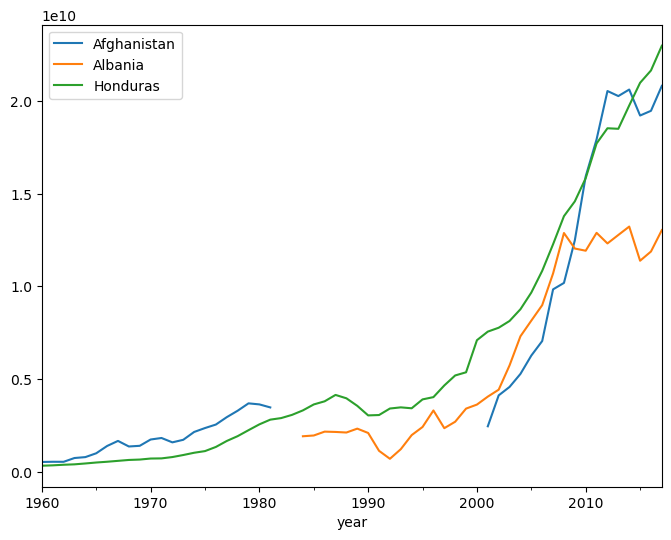

In [83]:
plot_results('GDP')

##### Imputing using mean

In [84]:
df_melt['GDP_filled'] = df_melt.groupby('Country Name')['GDP'].transform(lambda x: x.fillna(x.mean()))
df_melt.head()

,Country Name,Country Code,Indicator Name,Indicator Code,year,GDP,GDP_filled
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,NaN,2.036355e+09
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,5.377778e+08,5.377778e+08
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,NaN,3.847557e+10
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,NaN,6.220172e+09
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,NaN,1.501056e+09


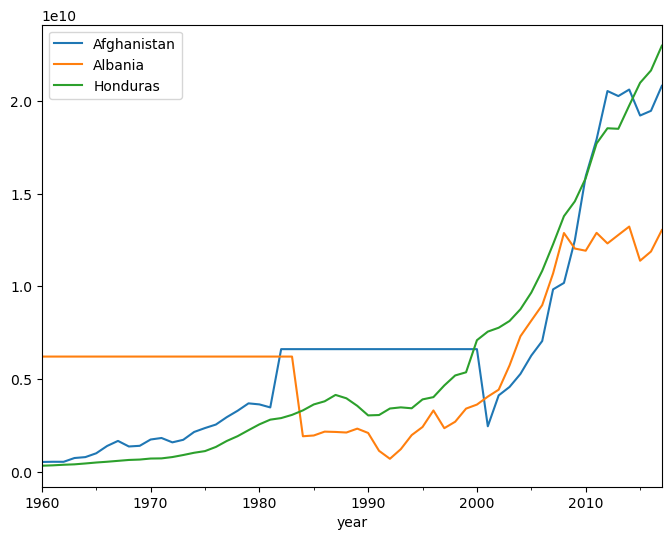

In [85]:
plot_results('GDP_filled')

This is somewhat of an improvement. At least there is no missing data; however, because GDP tends to increase over time, the mean GDP is probably not the best way to fill in missing values for this particular case. Next, try using forward fill to deal with any missing values.

##### Imputing using forward fill

In [86]:
df_melt['GDP_ffill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].ffill()
df_melt.head()

,Country Name,Country Code,Indicator Name,Indicator Code,year,GDP,GDP_filled,GDP_ffill
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,NaN,2.036355e+09,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,5.377778e+08,5.377778e+08,5.377778e+08
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,NaN,3.847557e+10,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,NaN,6.220172e+09,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,NaN,1.501056e+09,NaN


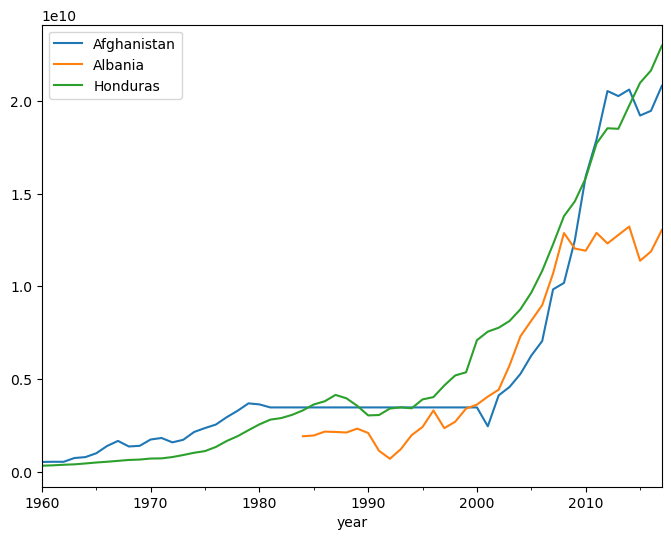

In [87]:
plot_results('GDP_ffill')

This looks better at least for the Afghanistan data; however, the Albania data is still missing values. You can fill in the Albania data using back fill. That is what you'll do next.

In [88]:
df_melt['GDP_bfill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].bfill()

In [89]:
df_melt.head()

,Country Name,Country Code,Indicator Name,Indicator Code,year,GDP,GDP_filled,GDP_ffill,GDP_bfill
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,NaN,2.036355e+09,NaN,1.330168e+09
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,5.377778e+08,5.377778e+08,5.377778e+08,5.377778e+08
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,NaN,3.847557e+10,NaN,5.934074e+09
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,NaN,6.220172e+09,NaN,1.924242e+09
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,NaN,1.501056e+09,NaN,7.861921e+07


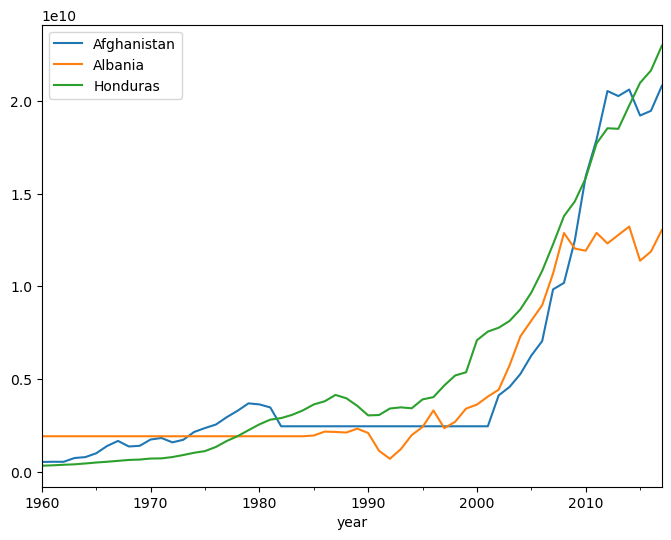

In [90]:
plot_results('GDP_bfill')

In this case, the GDP data for all three countries is now complete. Note that forward fill did not fill all the Albania data because the first data entry in 1960 was NaN. Forward fill would try to fill the 1961 value with the NaN value from 1960.

To completely fill the entire GDP data for all countries, you might have to run both forward fill and back fill. Note as well that the results will be slightly different depending on if you run forward fill first or back fill first. Afghanistan, for example, is missing data in the middle of the data set. Hence forward fill and back fill will have slightly different results.

Run this next code cell to see if running both forward fill and back fill end up filling all the GDP NaN values.

In [91]:
# Run forward fill and backward fill on the GDP data
df_melt['GDP_ff_bf'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].ffill().bfill()

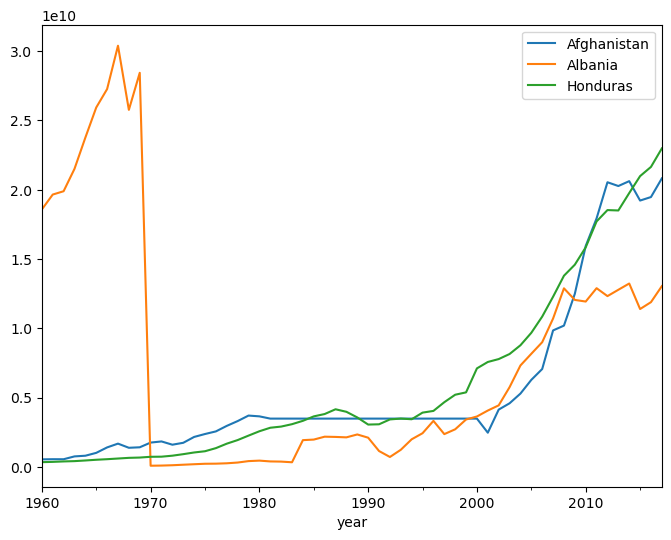

In [92]:
plot_results('GDP_ff_bf')

In [93]:
df_melt['GDP_bf_ff'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].bfill().ffill()


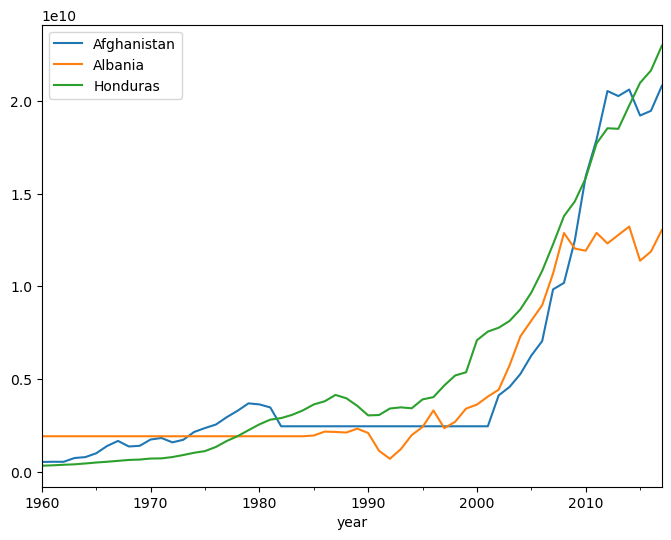

In [94]:
plot_results('GDP_bf_ff')

Better if backfill done first then forwardfill

##### Dummy Variables

The World Bank data is not particularly clean, so you'll need to explore and wrangle the data first.

You'll focus on the text values in the sector variables.

In [95]:
projects = pd.read_csv('projects_data.csv', dtype=str)
projects.drop('Unnamed: 56', axis=1, inplace=True)
projects['totalamt'] = pd.to_numeric(projects['totalamt'].str.replace(',', ''))
projects['countryname'] = projects['countryname'].str.split(';', expand=True)[0]
projects['boardapprovaldate'] = pd.to_datetime(projects['boardapprovaldate'])

# keep the project name, lending, sector and theme data
sector = projects.copy()
sector = sector[['project_name', 'lendinginstr', 'sector1', 'sector2', 'sector3', 'sector4', 'sector5', 'sector',
          'mjsector1', 'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5',
          'mjsector', 'theme1', 'theme2', 'theme3', 'theme4', 'theme5', 'theme ',
          'goal', 'financier', 'mjtheme1name', 'mjtheme2name', 'mjtheme3name',
          'mjtheme4name', 'mjtheme5name']]

Run the code cell below. This cell shows the percentage of each variable that is null. Notice the mjsector1 through mjsector5 variables are all null. The mjtheme1name through mjtheme5name are also all null as well as the theme variable.

Because these variables contain so many null values, they're probably not very useful.

In [96]:
# output percentage of values that are missing
100 * sector.isnull().sum() / sector.shape[0]

project_name      0.000000
lendinginstr      1.348093
sector1           0.000000
sector2          47.791539
sector3          64.450899
sector4          76.019290
sector5          85.132617
sector            3.496274
mjsector1       100.000000
mjsector2       100.000000
mjsector3       100.000000
mjsector4       100.000000
mjsector5       100.000000
mjsector          3.496274
theme1            0.000000
theme2           46.005042
theme3           58.987286
theme4           71.317405
theme5           83.954406
theme           100.000000
goal             33.510522
financier        61.310829
mjtheme1name    100.000000
mjtheme2name    100.000000
mjtheme3name    100.000000
mjtheme4name    100.000000
mjtheme5name    100.000000
dtype: float64

The sector1 variable looks promising; it doesn't contain any null values at all. In the next cell, store the unique sector1 values in a list and output the results. Use the sort_values() and unique() methods.

In [97]:
# Create a list of the unique values in sector1. Use the sort_values() and unique() pandas methods. 
# And then convert those results into a Python list
uniquesectors1 = sector['sector1'].sort_values().unique()
uniquesectors1

array(['!$!0', '(Historic)Agency reform!$!50!$!AG',
       '(Historic)Agricultural credit!$!100!$!AC', ...,
       'Workforce Development and Vocational Education!$!96!$!EW',
       'Workforce Development and Vocational Education!$!98!$!EW',
       'Workforce Development and Vocational Education!$!99!$!EW'],
      dtype=object)

In [98]:
# run this code cell to see the number of unique values
print('Number of unique values in sector1:', len(uniquesectors1))

Number of unique values in sector1: 3060


##### replace() method

In [99]:
# TODO: In the sector1 variable, replace the string '!$10' with nan
# HINT: you can use the pandas replace() method and numpy.nan
sector['sector1'] = sector['sector1'].replace('!$!0', np.nan)

# TODO: In the sector1 variable, remove the last 10 or 11 characters from the sector1 variable.
# HINT: There is more than one way to do this including the replace method
# HINT: You can use a regex expression '!.+'
# That regex expression looks for a string with an exclamation
# point followed by one or more characters

sector['sector1'] = sector['sector1'].replace('!.+', '', regex=True)

# TODO: Remove the string '(Historic)' from the sector1 variable
# HINT: You can use the replace method
sector['sector1'] = sector['sector1'].replace('^(\(Historic\))', '', regex=True)

print('Number of unique sectors after cleaning:', len(list(sector['sector1'].unique())))
print('Percentage of null values after cleaning:', 100 * sector['sector1'].isnull().sum() / sector['sector1'].shape[0])

Number of unique sectors after cleaning: 156
Percentage of null values after cleaning: 3.4962735642262164


Now there are 156 unique categorical values. That's better than 3060. If you were going to use this data with a supervised learning machine model, you could try converting these 156 values to dummy variables. You'd still have to train and test a model to see if those are good features.

In this next exercise, use the pandas pd.get_dummies() method to create dummy variables. Then use the concat() method to concatenate the dummy variables to a dataframe that contains the project totalamt variable and the project year from the boardapprovaldate.

In [100]:
dummies = pd.DataFrame(pd.get_dummies(sector['sector1']))

#  Filter the projects data for the totalamt, the year from boardapprovaldate, and the dummy variables
projects['year'] = projects['boardapprovaldate'].dt.year
df = projects[['totalamt','year']]
df_final = pd.concat([df, dummies], axis=1)

df_final.head()

,totalamt,year,Adult; Basic and Continuing Education,Agency reform,Agricultural Extension; Research; and Other Support Activities,Agricultural credit,Agricultural extension,Agricultural markets; commercialization and agri-business,Agriculture adjustment,Agro-industry,...,Urban environment,Urban housing,Urban management,Urban transport,Urban water supply,Vocational training,Waste Management,Water Supply,Water supply and sanitation adjustment,Workforce Development and Vocational Education
0,0,2018.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,200000000,2018.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,58330000,2018.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,20000000,2018.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,100000000,2018.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Finding Outliers

In this, I'll practice looking for outliers. I'll look at the World Bank GDP and population data sets. First, you'll look at the data from a one-dimensional perspective and then a two-dimensional perspective.

Run the code below to import the data sets and prepare the data for analysis. The code:- reads in the data sets
- reshapes the datasets to a long format
- uses back fill and forward fill to fill in missing values
- merges the gdp and population data together
- shows the first 10 values in the data setdata set

In [101]:
# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].bfill().ffill()

population_melt = population.melt(id_vars=['Country Name'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].bfill().ffill()

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# see what the data looks like
df_2016.head(10)

,Country Name,year,gdp,population
14784,Aruba,2016,1.667079e+09,104822.0
14785,Afghanistan,2016,1.946902e+10,34656032.0
14786,Angola,2016,9.533720e+10,28813463.0
14787,Albania,2016,1.188368e+10,2876101.0
14788,Andorra,2016,2.877312e+09,77281.0
14789,Arab World,2016,2.500164e+12,406452690.0
14790,United Arab Emirates,2016,3.570451e+11,9269612.0
14791,Argentina,2016,5.548609e+11,43847430.0
14792,Armenia,2016,1.054614e+10,2924816.0
14793,American Samoa,2016,6.580000e+08,55599.0


Explore the data set to identify outliers using the Tukey rule.

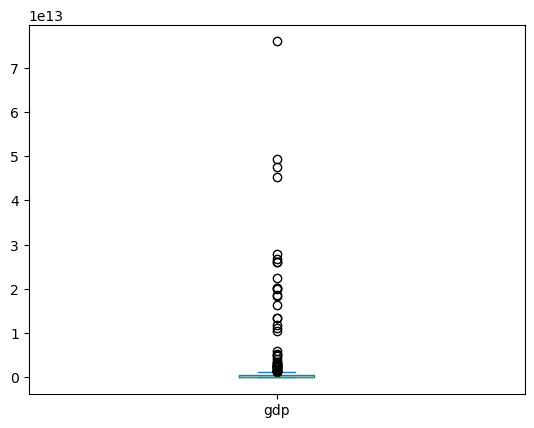

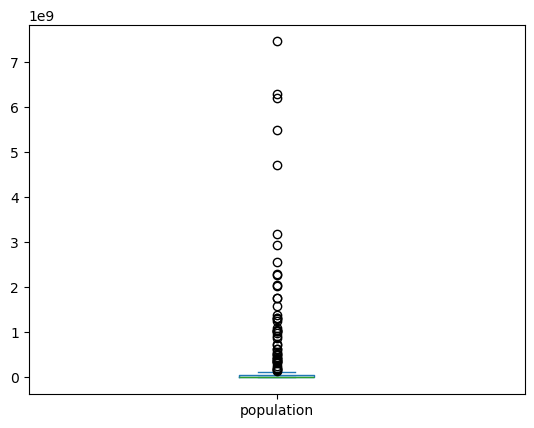

In [102]:
# Make a boxplot of the population data for the year 2016
df_2016.plot('population',kind='box');

# Make a boxplot of the gdp data for the year 2016
df_2016.plot('gdp',kind='box');

Use the Tukey rule to determine what values of the population data are outliers for the year 2016. The Tukey rule finds outliers in one-dimension. The steps are:

- Find the first quartile (ie .25 quantile)
- Find the third quartile (ie .75 quantile)
- Calculate the inter-quartile range (Q3 - Q1)
- Any value that is greater than Q3 + 1.5 * IQR is an outlier
- Any value that is less than Qe - 1.5 * IQR is an outlier

In [103]:
population_2016 = df_2016[['Country Name','population']]

# Calculate the first quartile of the population values for 2016
# HINT: you can use the pandas quantile method 
Q1 = population_2016['population'].quantile(0.25)

# Calculate the third quartile of the population values for 2016
Q3 = population_2016['population'].quantile(0.75)

# Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# filter the population_2016 data for population values that are greater than max_value or less than min_value
population_outliers = population_2016[(population_2016['population'] > max_value) | (population_2016['population'] < min_value)]
population_outliers

,Country Name,population
14789,Arab World,4.064527e+08
14802,Bangladesh,1.629516e+08
14811,Brazil,2.076529e+08
14822,China,1.378665e+09
14843,East Asia & Pacific (excluding high income),2.053299e+09
14844,Early-demographic dividend,3.170658e+09
14845,East Asia & Pacific,2.298727e+09
14846,Europe & Central Asia (excluding high income),4.132349e+08
14847,Europe & Central Asia,9.116863e+08
14850,Euro area,3.406174e+08


Clearly many of these outliers are due to regional data getting aggregated together.

Remove these data points and redo the analysis. There's a list provided below of the 'Country Name' values that are not actually countries.

In [104]:
# remove the rows from the data that have Country Name values in the non_countries list
# Store the filter results back into the df_2016 variable

non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]

In [105]:
# Re-rerun the Tukey code with this filtered data to find population outliers

# Filter the data for the year 2016 and put the results in the population_2016 variable. You only need
# to keep the Country Name and population columns
population_2016 = df_2016[['Country Name','population']]

# Calculate the first quartile of the population values
# HINT: you can use the pandas quantile method 
Q1 = population_2016['population'].quantile(0.25)

# Calculate the third quartile of the population values
Q3 = population_2016['population'].quantile(0.75)

# Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# filter the population_2016 data for population values that are greater than max_value or less than min_value
population_outliers = population_2016[(population_2016['population'] > max_value) | (population_2016['population'] < min_value)]
population_outliers

,Country Name,population
14802,Bangladesh,1.629516e+08
14811,Brazil,2.076529e+08
14822,China,1.378665e+09
14825,"Congo, Dem. Rep.",7.873615e+07
14837,Germany,8.234867e+07
14849,"Egypt, Arab Rep.",9.568868e+07
14854,Ethiopia,1.024032e+08
14859,France,6.685977e+07
14863,United Kingdom,6.559556e+07
14888,Indonesia,2.611155e+08


In [106]:
# Filter the data for the year 2016 and put the results in the population_2016 variable. You only need
# to keep the Country Name and population columns
gdp_2016 = df_2016[['Country Name','gdp']]

# Calculate the first quartile of the population values
# HINT: you can use the pandas quantile method 
Q1 = gdp_2016['gdp'].quantile(0.25)

# Calculate the third quartile of the population values
Q3 = gdp_2016['gdp'].quantile(0.75)

# Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# filter the population_2016 data for population values that are greater than max_value or less than min_value
gdp_outliers = gdp_2016[(gdp_2016['gdp'] > max_value) | (gdp_2016['gdp'] < min_value)]
gdp_outliers

,Country Name,gdp
14791,Argentina,5.548609e+11
14795,Australia,1.208039e+12
14799,Belgium,4.675455e+11
14811,Brazil,1.793989e+12
14817,Canada,1.535768e+12
14819,Switzerland,6.687453e+11
14820,Channel Islands,6.687453e+11
14822,China,1.119099e+13
14837,Germany,3.477796e+12
14852,Spain,1.237255e+12


Next, write code to determine which countries are in the population_outliers array and in the gdp_outliers array.

In [107]:
# Find country names that are in both the population_outliers and the gdp_outliers 
# HINT: you can use the pandas intersection() method and python set() and list() methods

list(set(population_outliers['Country Name']).intersection(gdp_outliers['Country Name']))

['France',
 'Japan',
 'India',
 'Italy',
 'Indonesia',
 'United Kingdom',
 'Mexico',
 'Turkey',
 'Russian Federation',
 'Germany',
 'United States',
 'Brazil',
 'China']

These countries have both relatively high populations and high GDPs. That might be an indication that although these countries have high values for both gdp and population, they're not true outliers when looking at these values from a two-dimensional perspective.

Now write code to find countries in population_outliers but not in the gdp_outliers.

In [108]:
# Find country names that are in the population outliers list but not the gdp outliers list
# HINT: Python's set() and list() methods should be helpful

list(set(population_outliers['Country Name']) - set(gdp_outliers['Country Name']))

['Iran, Islamic Rep.',
 'Vietnam',
 'Philippines',
 'Egypt, Arab Rep.',
 'Bangladesh',
 'Ethiopia',
 'Pakistan',
 'Congo, Dem. Rep.',
 'Thailand',
 'Nigeria']

These countries are population outliers but not GDP outliers. If looking at outliers from a two-dimensional perspective, there's some indication that these countries might be outliers.

And finally, write code to find countries that are in the gdp_outliers array but not the population_outliers array.

In [109]:
# Find country names that are in the gdp outliers list but not the population outliers list
# HINT: Python's set() and list() methods should be helpful

list(set(gdp_outliers['Country Name']) - set(population_outliers['Country Name']))

['Argentina',
 'Poland',
 'Canada',
 'Korea, Rep.',
 'Netherlands',
 'Switzerland',
 'Saudi Arabia',
 'Channel Islands',
 'Faroe Islands',
 'Isle of Man',
 'Spain',
 'Sweden',
 'Liechtenstein',
 'Australia',
 'Belgium']

On the other hand, these countries have high GDP but are not population outliers.

2-Dimensional Analysis

Next, look at the data from a two-dimensional perspective.

The next code cell plots the GDP vs Population data including the country name of each point.

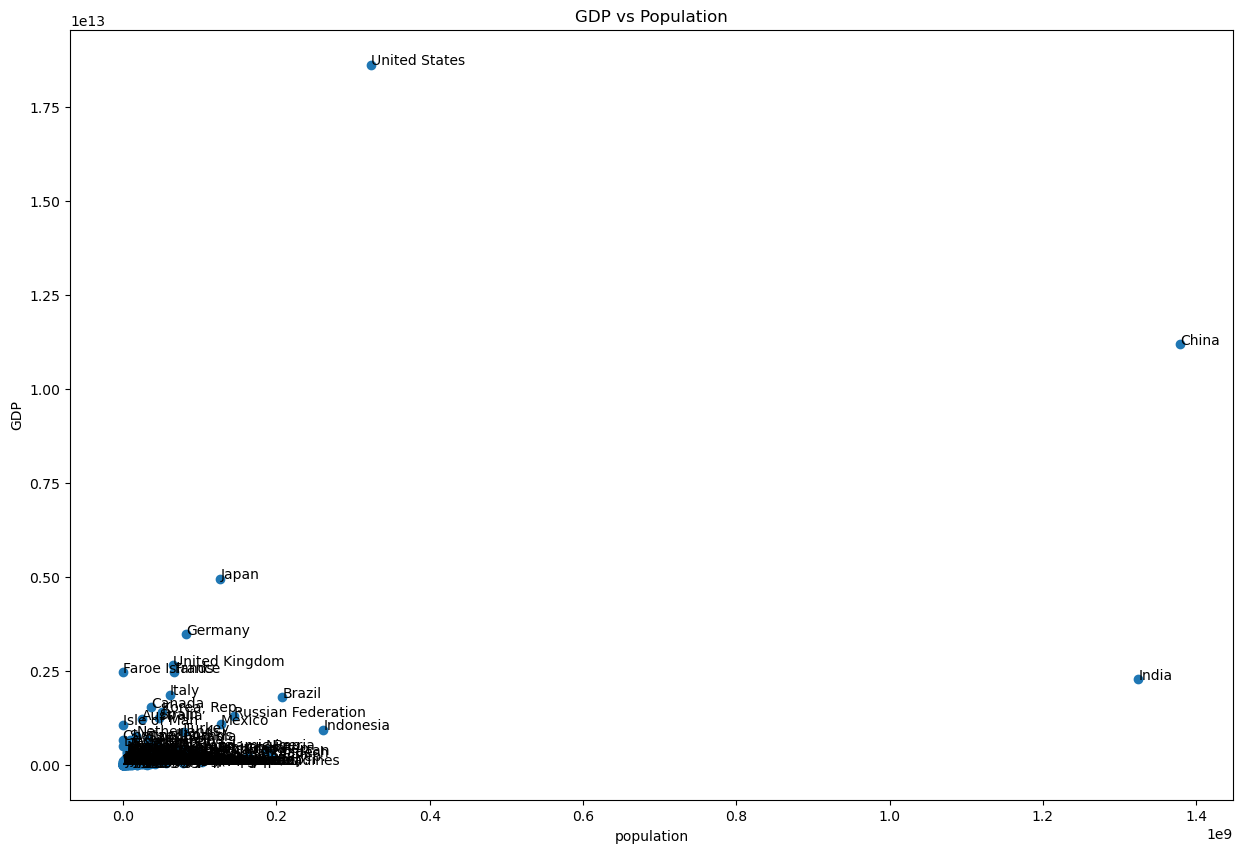

In [110]:
x = list(df_2016['population'])
y = list(df_2016['gdp'])
text = df_2016['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

The United States, China, and India have such larger values that it's hard to see this data. Let's take those countries out for a moment and look at the data again.

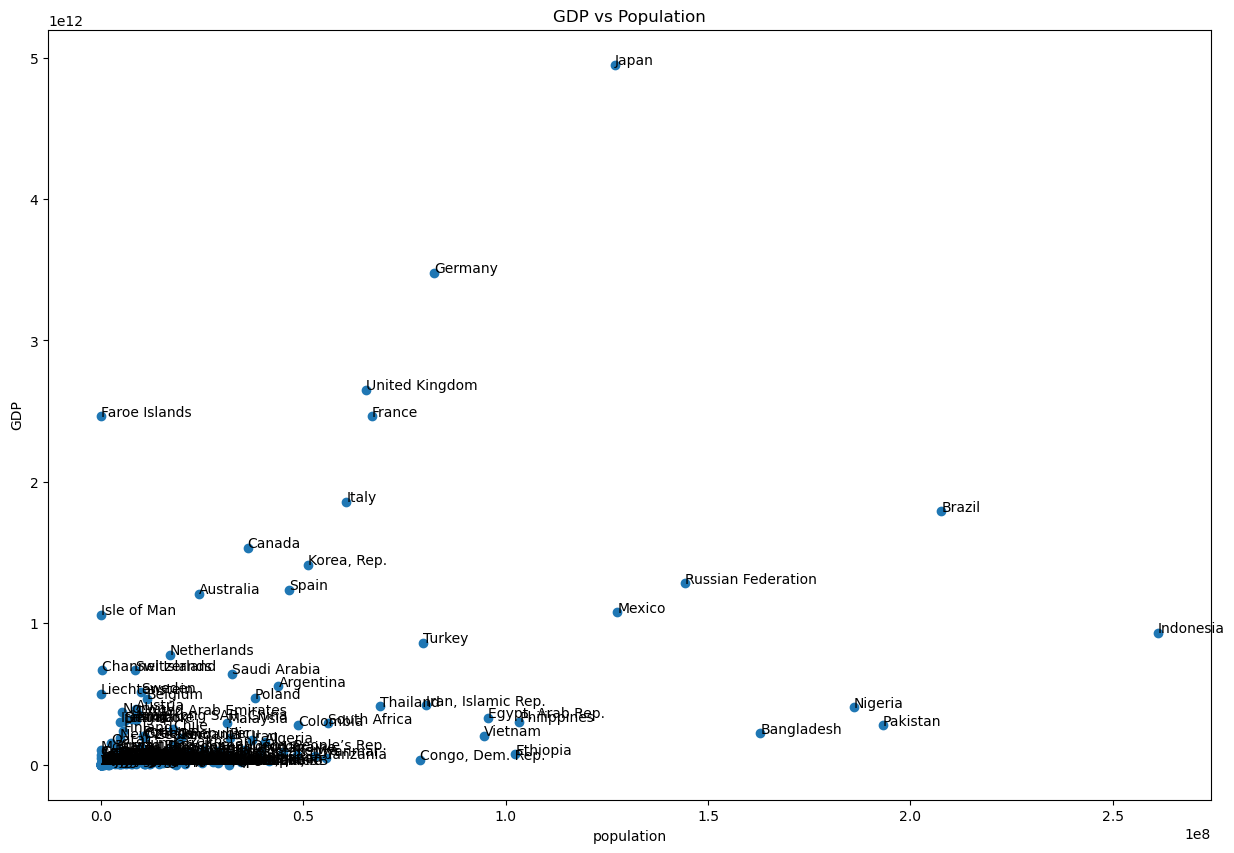

In [111]:
df_no_large = (df_2016['Country Name'] != 'United States') & (df_2016['Country Name'] != 'India') & (df_2016['Country Name'] != 'China')
x = list(df_2016[df_no_large]['population'])
y = list(df_2016[df_no_large]['gdp'])
text = df_2016[df_no_large]['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

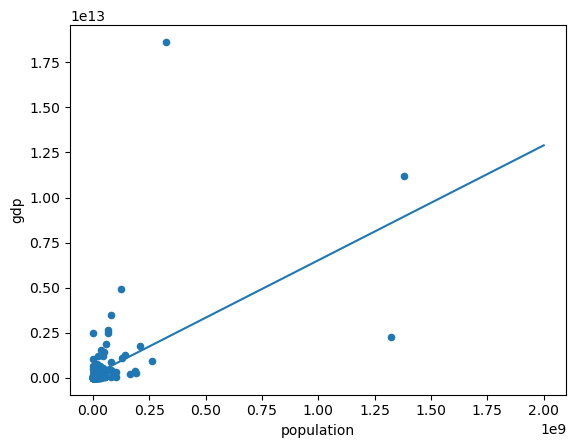

In [112]:
from sklearn.linear_model import LinearRegression

# fit a linear regression model on the population and gdp data
model = LinearRegression()
model.fit(df_2016['population'].values.reshape(-1, 1), df_2016['gdp'].values.reshape(-1, 1))

# plot the data along with predictions from the linear regression model
inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))

df_2016.plot('population', 'gdp', kind='scatter')
plt.plot(inputs, predictions)

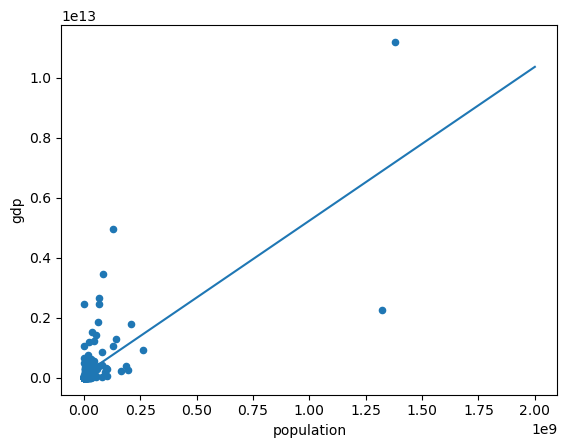

In [113]:
# Remove the United States to see what happens with the linear regression model
df_2016[df_2016['Country Name'] != 'United States'].plot('population', 'gdp', kind='scatter')
# plt.plot(inputs, predictions)
model.fit(df_2016[df_2016['Country Name'] != 'United States']['population'].values.reshape(-1, 1), 
          df_2016[df_2016['Country Name'] != 'United States']['gdp'].values.reshape(-1, 1))
inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))
plt.plot(inputs, predictions)

Write a function that uses the Tukey rule to eliminate outliers from an array of data.

In [114]:
# Write a function that uses the Tukey rule to detect outliers in a dataframe column 
# and then removes that entire row from the data frame. For example, if the United States 
# is detected to be a GDP outlier, then remove the entire row of United States data.
# The function inputs should be a data frame and a column name.
# The output is a data_frame with the outliers eliminated

# HINT: Re-use code from the previous exercise

def tukey_rule(data_frame, column_name):
    data = data_frame[column_name]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    max_value = Q3 + 1.5 * IQR
    min_value = Q1 - 1.5 * IQR
    
    return data_frame[(data_frame[column_name] < max_value) & (data_frame[column_name] > min_value)]

Now use the function to eliminate population outliers and then gdp outliers from the dataframe. Store results in the df_outlier_removed variable.

In [115]:
# Use the tukey_rule() function to make a new data frame with gdp and population outliers removed
# Put the results in the df_outlier_removed variable

df_outlier_removed = df_2016.copy()

for column in ['population','gdp']:
    df_outlier_removed = tukey_rule(df_outlier_removed, column)

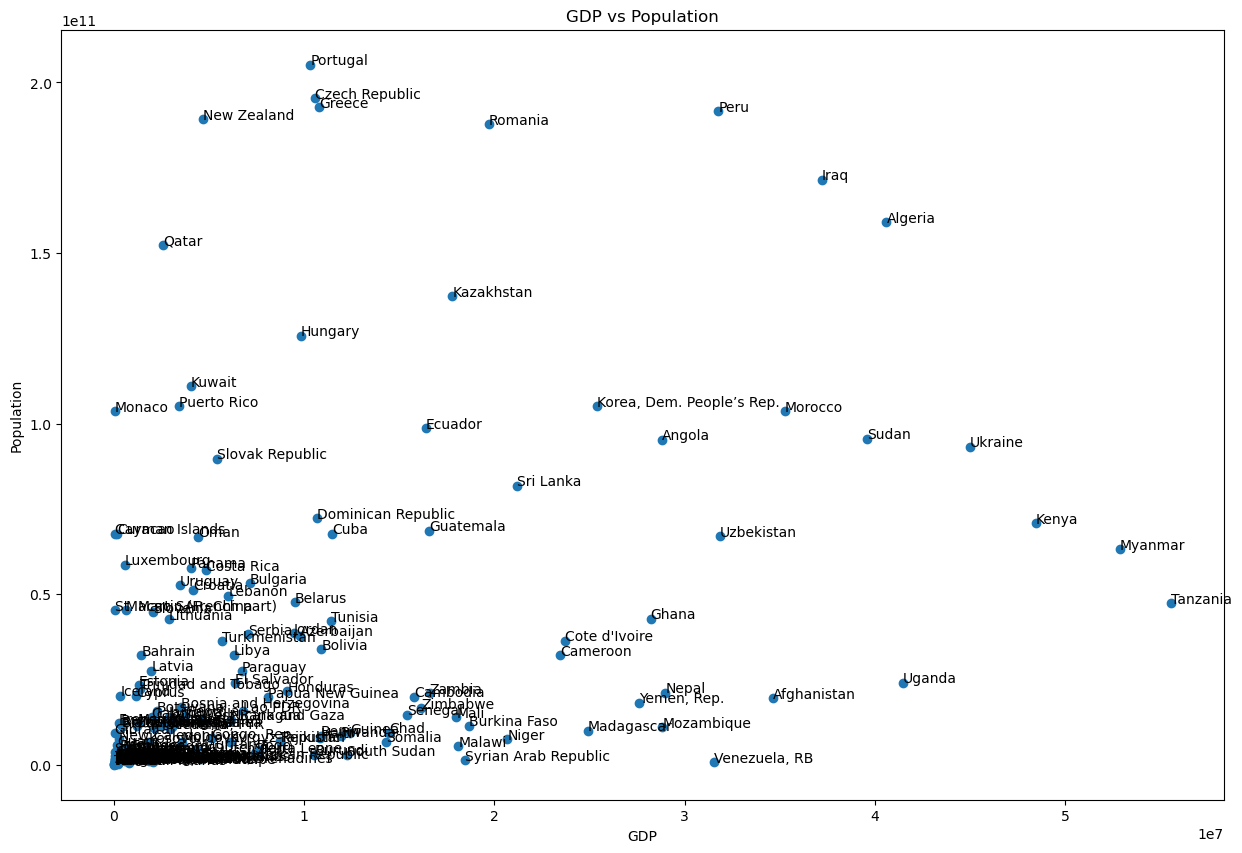

In [116]:
# plot the data
x = list(df_outlier_removed['population'])
y = list(df_outlier_removed['gdp'])
text = df_outlier_removed['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('GDP')
plt.ylabel('Population')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

#### Scaling Data

In this exercise, you'll practice scaling data. Sometimes, you'll see the terms **standardization** and **normalization** used interchangeably when referring to feature scaling. However, these are slightly different operations. Standardization refers to scaling a set of values so that they have a mean of zero and a standard deviation of one. Normalization refers to scaling a set of values so that the range if between zero and one.

In this exercise, you'll practice implementing standardization and normalization in code. There are libraries, like scikit-learn, that can do this for you; however, in data engineering, you might not always have these tools available.

In [117]:
# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# filter out values that are not countries
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]


# show the first ten rows
print('first ten rows of data')
df_2016.head(10)

first ten rows of data


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26384\1917280743.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26384\1917280743.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')


,Country Name,year,gdp,population
14784,Aruba,2016,2.584464e+09,104822.0
14785,Afghanistan,2016,1.946902e+10,34656032.0
14786,Angola,2016,9.533720e+10,28813463.0
14787,Albania,2016,1.188368e+10,2876101.0
14788,Andorra,2016,2.877312e+09,77281.0
14790,United Arab Emirates,2016,3.570451e+11,9269612.0
14791,Argentina,2016,5.548609e+11,43847430.0
14792,Armenia,2016,1.054614e+10,2924816.0
14793,American Samoa,2016,6.580000e+08,55599.0
14794,Antigua and Barbuda,2016,1.460145e+09,100963.0


Normalize the Data

To normalize data, you take a feature, like gdp, and use the following formula
$$x = \frac{x-x~min~}{x~max~-x~min~}$$

where
- x is a value of gdp
- x_max is the maximum gdp in the data
- x_min is the minimum GDP in the data

First, write a function that outputs the x_min and x_max values of an array. The inputs are an array of data (like the GDP data). The outputs are the x_min and x_max values


In [118]:
def x_min_max(data):
    minimum = min(data)
    maximum = max(data)
    return minimum, maximum

x_min_max(df_2016['gdp'])

(36572611.8853148, 18624475000000.0)

Next, write a function that normalizes a data point. The inputs are an x value, a minimum value, and a maximum value. The output is the normalized data point

In [119]:
def normalize(x, x_min, x_max):
    # Complete this function
    # The input is a single value 
    # The output is the normalized value
    return (x - x_min) / (x_max - x_min)

Why are you making these separate functions? Let's say you are training a machine learning model and using normalized GDP as a feature. As new data comes in, you'll want to make predictions using the new GDP data. You'll have to normalize this incoming data. To do that, you need to store the x_min and x_max from the training set. Hence the x_min_max() function gives you the minimum and maximum values, which you can then store in a variable.

A good way to keep track of the minimum and maximum values would be to use a class. In this next section, fill out the Normalizer() class code to make a class that normalizes a data set and stores min and max values.

In [120]:
class Normalizer():
    # Complete the normalizer class
    # The normalizer class receives a dataframe as its only input for initialization
    # For example, the data frame might contain gdp and population data in two separate columns
    # Follow the TODOs in each section
    
    def __init__(self, dataframe):
        
        # complete the init function. 
        # Assume the dataframe has an unknown number of columns like [['gdp', 'population']] 
        # iterate through each column calculating the min and max for each column
        # append the results to the params attribute list
        
        # For example, take the gdp column and calculate the minimum and maximum
        # Put these results in a list [minimum, maximum]
        # Append the list to the params variable
        # Then take the population column and do the same
        
        # HINT: You can put your x_min_max() function as part of this class and use it
        
        self.params = []

        for column in dataframe.columns:
            self.params.append(x_min_max(dataframe[column]))
            
    def x_min_max(data):
        # complete the x_min_max method
        # HINT: You can use the same function defined earlier in the exercise
        minimum = min(data)
        maximum = max(data)
        return minimum, maximum

    def normalize_data(self, x):
        # complete the normalize_data method
        # The function receives a data point as an input and then outputs the normalized version
        # For example, if an input data point of [gdp, population] were used. Then the output would
        # be the normalized version of the [gdp, population] data point
        # Put the results in the normalized variable defined below
        
        # Assume that the columns in the dataframe used to initialize an object are in the same
        # order as this data point x
        
        # HINT: You cannot use the normalize_data function defined earlier in the exercise.
        # You'll need to iterate through the individual values in the x variable        
        # Use the params attribute where the min and max values are stored 
        normalized = []
        for i, value in enumerate(x):
            x_max = self.params[i][1]
            x_min = self.params[i][0]
            normalized.append((x[i] - x_min) / (x_max - x_min))
        return normalized

In [121]:
gdp_normalizer = Normalizer(df_2016[['gdp', 'population']])

In [122]:
gdp_normalizer.params

[(36572611.8853148, 18624475000000.0), (11097.0, 1378665000.0)]

In [123]:
gdp_normalizer.normalize_data([13424475000000.0, 1300000000])

[0.7207969507229194, 0.9429407193285986]